# 연습문제
groceries.csv  
market.csv  
연관규칙(지지도, 신뢰도, 향상도)  
의미있는 번들상품 아이템을 검색  
특정 고객에게 홍보하기  
{돼지고기} -> {상추} 향상도:2  

구매했던 상품을 입력하세요: 돼지고기  
추천하고싶은 상품은 상추입니다.

In [1]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [65]:
#groceries = np.loadtxt("../datasets/groceries.csv", delimiter='\n', dtype=str)
groceries = pd.read_csv("../datasets/groceries.csv", delimiter='\n', header=None)
groceries = groceries[0].str.split(',', expand=True)
groceries.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,tropical fruit,yogurt,coffee,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,whole milk,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,pip fruit,yogurt,cream cheese,meat spreads,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,other vegetables,whole milk,condensed milk,long life bakery product,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [97]:
groceries_list = []

for i in range(groceries.shape[0]):
    temp = []
    for j in range(groceries.shape[1]):
        temp.append(str(groceries.iloc[i, j]))
    groceries_list.append(temp)
    
len(groceries_list)

9835

In [98]:
te = TransactionEncoder()
te_array = te.fit_transform(groceries_list)
te_array

array([[False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False,  True, False],
       [False,  True, False, ...,  True, False, False],
       ...,
       [False,  True, False, ..., False,  True, False],
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [100]:
te_result = pd.DataFrame(te_array, columns=te.columns_)
te_result.drop('None', axis=1, inplace=True)

In [111]:
count = te_result.sum()
pop_item = count.sort_values(ascending=False)
pop_item = pop_item.to_frame().reset_index()
pop_item.rename(columns={'index': 'items', 0: 'count'}, inplace=True)
pop_item.head()

,items,count
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809
3,soda,1715
4,yogurt,1372


In [127]:
pop_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   items   169 non-null    object
 1   count   169 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


Text(0.5, 1.0, 'Top 20 items')

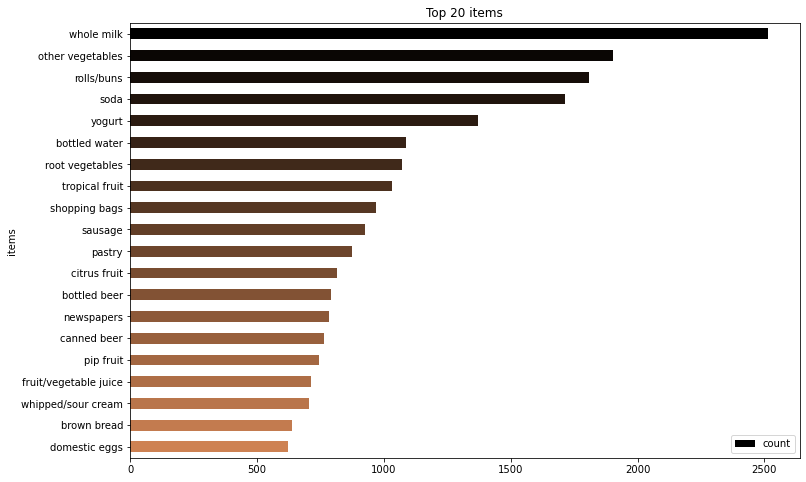

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 8)
pop_item.head(20).plot.barh(x='items',
                            y='count',
                            color=plt.cm.copper(np.linspace(0, 1, 30))
                           ).invert_yaxis()
plt.title('Top 20 items')

In [126]:
apriori(te_result, min_support = 0.03, use_colnames = True)

,support,itemsets
0,0.033452,(UHT-milk)
1,0.052466,(beef)
2,0.033249,(berries)
3,0.080529,(bottled beer)
4,0.110524,(bottled water)
...,...,...
58,0.048907,"(root vegetables, whole milk)"
59,0.040061,"(soda, whole milk)"
60,0.042298,"(whole milk, tropical fruit)"
61,0.032232,"(whole milk, whipped/sour cream)"
